# Импорт библиотек

In [2]:
import pandas as pd
import numpy as np
import sqlite3

# Постановка задачи

Провести RFM-анализ клиентов банка, определить основные сегменты по покупательской активности

RFM-анализ — метод сегментации клиентов, основанный на их покупательской активности.

Включает: 

Recency (R) — время, прошедшее с момента последней покупки клиента. Чем меньше этот показатель, тем выше вероятность, что клиент совершит покупку снова.

Frequency (F) — количество покупок за определённый период. Клиенты, совершающие покупки часто, с большей вероятностью продолжат это делать.

Monetary (M) — общая сумма денег, потраченная клиентом. Клиенты с высоким показателем M демонстрируют высокую ценность для бизнеса.

Клиентов ранжируют по каждому из этих трёх параметров и делят на группы (например, от 1 до 3, где 3 — наилучшее значение). Комбинация трёх оценок (например, R=3, F=1, M=2) определяет RMF-сегмент, который описывает тип поведения клиента.

# Информация о датасете

- tran_dttm - дата транзакции
- tran_amt - сумма транзакции
- disbursment_dt - дата открытия счета
- customer_rk - уникальный id клиента
- limit - кредитный лимит по карте
- caption - магазин, где была совершена транзакция

# Загрузка данных Pandas

In [9]:
df = pd.read_excel('data_bank.xlsx')

In [10]:
df

,TRAN_DTTM,TRAN_AMT,DISBURSMENT_DT,CUSTOMER_RK,LIMIT,caption
0,2017-03-02 18:33:17.000,31.00,2017-03-01 00:00:00.000,14829027,15000.0,Пятерочка
1,2017-03-03 18:43:44.000,21.00,2017-03-01 00:00:00.000,14829027,15000.0,Пятерочка
2,2017-03-05 15:23:33.000,144.00,2017-03-03 00:00:00.000,4107662,15000.0,Успех
3,2017-03-07 11:17:26.000,1741.27,2017-03-03 00:00:00.000,4107662,15000.0,Новэкс
4,2017-03-18 13:04:13.000,6964.50,2017-03-06 00:00:00.000,39362150,0.0,Снежная Королева
...,...,...,...,...,...,...
9358,2018-03-27 17:08:40.000,416.85,2017-10-02 00:00:00.000,58935550,15000.0,Пятерочка
9359,2018-03-27 17:52:04.000,2641.00,2017-10-11 00:00:00.000,60039617,15000.0,PoiskHome
9360,2018-03-27 18:08:28.000,1014.08,2017-10-16 00:00:00.000,6077108,0.1,Перекресток
9361,2018-03-27 18:31:21.000,988.14,2017-10-12 00:00:00.000,8140818,60000.0,Пятерочка


# Подготовка датасета

## Преобразование типов данных

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9363 entries, 0 to 9362
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TRAN_DTTM       9363 non-null   object 
 1   TRAN_AMT        9363 non-null   float64
 2   DISBURSMENT_DT  9363 non-null   object 
 3   CUSTOMER_RK     9363 non-null   int64  
 4   LIMIT           9342 non-null   float64
 5   caption         9363 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 439.0+ KB


In [14]:
df.dtypes

TRAN_DTTM          object
TRAN_AMT          float64
DISBURSMENT_DT     object
CUSTOMER_RK         int64
LIMIT             float64
caption            object
dtype: object

In [15]:
df['TRAN_DTTM'] = pd.to_datetime(df['TRAN_DTTM'], format='%Y-%m-%d %H:%M:%S.%f')
df['DISBURSMENT_DT'] = pd.to_datetime(df['TRAN_DTTM'], format='%Y-%m-%d %H:%M:%S.%f')

In [16]:
df['TRAN_AMT'] = df['TRAN_AMT'].astype(float)

In [17]:
df['caption'] = df['caption'].astype(str)

In [18]:
df.dtypes

TRAN_DTTM         datetime64[ns]
TRAN_AMT                 float64
DISBURSMENT_DT    datetime64[ns]
CUSTOMER_RK                int64
LIMIT                    float64
caption                   object
dtype: object

# Период транзакций

In [20]:
df['TRAN_DTTM'].agg(['min', 'max'])

min   2017-03-02 18:33:17
max   2018-03-27 18:33:59
Name: TRAN_DTTM, dtype: datetime64[ns]

# Загрузка данных SQL

In [22]:
# Устанавливаем соединение с файлом БД
conn = sqlite3.connect('db')

In [23]:
#Создаем курсор
cur = conn.cursor()

In [24]:
# функция для вызова sql запроса
def select(sql):
  return pd.read_sql(sql,conn)

In [25]:
df.to_sql('data_bank', conn, index=False, if_exists='replace')

9363

In [26]:
sql = ''' SELECT * FROM data_bank LIMIT 5'''

In [27]:
select(sql)

,TRAN_DTTM,TRAN_AMT,DISBURSMENT_DT,CUSTOMER_RK,LIMIT,caption
0,2017-03-02 18:33:17,31.00,2017-03-02 18:33:17,14829027,15000.0,Пятерочка
1,2017-03-03 18:43:44,21.00,2017-03-03 18:43:44,14829027,15000.0,Пятерочка
2,2017-03-05 15:23:33,144.00,2017-03-05 15:23:33,4107662,15000.0,Успех
3,2017-03-07 11:17:26,1741.27,2017-03-07 11:17:26,4107662,15000.0,Новэкс
4,2017-03-18 13:04:13,6964.50,2017-03-18 13:04:13,39362150,0.0,Снежная Королева


# Количество транзакций по месяцам

In [29]:
sql = ''' SELECT DATE(TRAN_DTTM, 'start of month') as month, COUNT(TRAN_AMT) AS tran_cnt
          FROM data_bank
          GROUP BY DATE(TRAN_DTTM, 'start of month')
            '''

In [30]:
select(sql)

,month,tran_cnt
0,2017-03-01,6
1,2017-04-01,12
2,2017-05-01,12
3,2017-06-01,49
4,2017-07-01,39
5,2017-08-01,18
6,2017-09-01,16
7,2017-10-01,3611
8,2017-11-01,2554
9,2017-12-01,769


# Считаем метрики для RFM

## Recency (R) - давность покупок

`Отчетную дату определим как конец отчётного периода. Все расчёты будут вестись относительно этой даты.`

In [34]:
sql = ''' 
SELECT t.*, julianday(t.reporting_date) - julianday(t.last_purchase_date) AS recency
FROM 
    (SELECT CUSTOMER_RK, MAX(TRAN_DTTM) AS last_purchase_date,
     MAX(TRAN_DTTM) OVER () AS reporting_date
     FROM data_bank
     GROUP BY CUSTOMER_RK) t
            '''

In [35]:
select(sql)

,CUSTOMER_RK,last_purchase_date,reporting_date,recency
0,1410,2017-11-04 11:39:48,2018-03-27 18:33:59,143.287627
1,1634,2018-02-21 09:11:22,2018-03-27 18:33:59,34.390706
2,3270,2017-11-04 11:08:45,2018-03-27 18:33:59,143.309190
3,3715,2017-10-29 14:57:11,2018-03-27 18:33:59,149.150556
4,9743,2017-10-14 13:44:36,2018-03-27 18:33:59,164.200961
...,...,...,...,...
8596,61234970,2017-11-06 09:05:36,2018-03-27 18:33:59,141.394711
8597,61296498,2017-12-27 18:43:06,2018-03-27 18:33:59,89.993669
8598,61296668,2017-12-23 20:55:47,2018-03-27 18:33:59,93.901528
8599,61298062,2017-10-31 20:23:18,2018-03-27 18:33:59,146.924086


## Frequency (F) - Частота покупок

In [37]:
sql = ''' SELECT CUSTOMER_RK,
          COUNT(TRAN_AMT) AS tran_cnt
          FROM data_bank
          GROUP BY CUSTOMER_RK
            '''

In [38]:
select(sql)

,CUSTOMER_RK,tran_cnt
0,1410,1
1,1634,1
2,3270,1
3,3715,1
4,9743,1
...,...,...
8596,61234970,1
8597,61296498,1
8598,61296668,1
8599,61298062,1


## Monetary (M) - сумма покупок

In [40]:
sql = ''' SELECT CUSTOMER_RK, SUM(TRAN_AMT) AS revenue,
          COUNT(TRAN_AMT) AS tran_cnt
          FROM data_bank
          GROUP BY CUSTOMER_RK
            '''

In [41]:
select(sql)

,CUSTOMER_RK,revenue,tran_cnt
0,1410,8300.00,1
1,1634,7798.00,1
2,3270,15000.00,1
3,3715,16910.57,1
4,9743,3590.00,1
...,...,...,...
8596,61234970,27000.00,1
8597,61296498,52622.00,1
8598,61296668,304.80,1
8599,61298062,365.05,1


In [42]:
t = select(sql)

<Axes: ylabel='Frequency'>

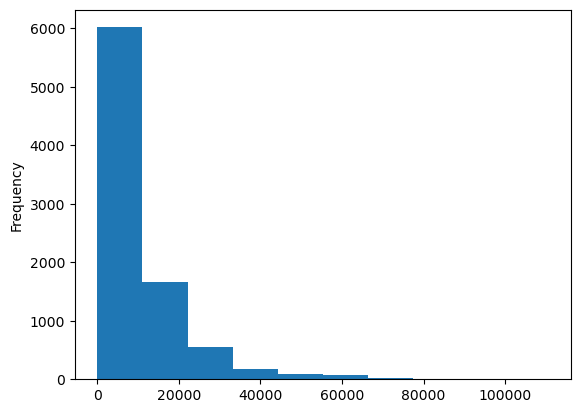

In [43]:
t['revenue'].plot(kind='hist')

## Единая таблица с метриками RFM

In [307]:
sql = ''' 
SELECT t.*,
       julianday(t.reporting_date) - julianday(t.last_purchase_date) AS recency
  FROM 
    (SELECT CUSTOMER_RK, SUM(TRAN_AMT) AS monetary, 
     COUNT(TRAN_AMT) AS frequency,
     MAX(t.TRAN_DTTM) AS last_purchase_date,
     MAX(t.TRAN_DTTM) OVER () AS reporting_date
     FROM data_bank t
     GROUP BY CUSTOMER_RK) t
      '''

In [309]:
select(sql)

,CUSTOMER_RK,monetary,frequency,last_purchase_date,reporting_date,recency
0,1410,8300.00,1,2017-11-04 11:39:48,2018-03-27 18:33:59,143.287627
1,1634,7798.00,1,2018-02-21 09:11:22,2018-03-27 18:33:59,34.390706
2,3270,15000.00,1,2017-11-04 11:08:45,2018-03-27 18:33:59,143.309190
3,3715,16910.57,1,2017-10-29 14:57:11,2018-03-27 18:33:59,149.150556
4,9743,3590.00,1,2017-10-14 13:44:36,2018-03-27 18:33:59,164.200961
...,...,...,...,...,...,...
8596,61234970,27000.00,1,2017-11-06 09:05:36,2018-03-27 18:33:59,141.394711
8597,61296498,52622.00,1,2017-12-27 18:43:06,2018-03-27 18:33:59,89.993669
8598,61296668,304.80,1,2017-12-23 20:55:47,2018-03-27 18:33:59,93.901528
8599,61298062,365.05,1,2017-10-31 20:23:18,2018-03-27 18:33:59,146.924086


In [311]:
t = select(sql)

# Присвоение R-, F-, M-баллов

Для присвоения R-, F-, M-баллов воспользуемся квантилями. Квантиль — это значение, которое делит набор данных на равные части. q-й квантиль — это такое значение, ниже которого находится q доля (или процент) всех наблюдений. Если мы хотим разделить все наблюдения на 4 равные группы, мы возьмем 25-й квантиль.

## Recency (R) - давность покупок

In [313]:
t['R'] = 6 - (pd.qcut(t['recency'], 5, labels=False) + 1)

In [315]:
t.groupby('R', observed=True)['recency'].agg(['count'])

,count
R,
1,1720
2,1720
3,1720
4,1720
5,1721


In [317]:
t['R'] = 4 - (pd.qcut(t['recency'], 3, labels=False) + 1)

In [319]:
t

,CUSTOMER_RK,monetary,frequency,last_purchase_date,reporting_date,recency,R
0,1410,8300.00,1,2017-11-04 11:39:48,2018-03-27 18:33:59,143.287627,2
1,1634,7798.00,1,2018-02-21 09:11:22,2018-03-27 18:33:59,34.390706,3
2,3270,15000.00,1,2017-11-04 11:08:45,2018-03-27 18:33:59,143.309190,2
3,3715,16910.57,1,2017-10-29 14:57:11,2018-03-27 18:33:59,149.150556,2
4,9743,3590.00,1,2017-10-14 13:44:36,2018-03-27 18:33:59,164.200961,1
...,...,...,...,...,...,...,...
8596,61234970,27000.00,1,2017-11-06 09:05:36,2018-03-27 18:33:59,141.394711,2
8597,61296498,52622.00,1,2017-12-27 18:43:06,2018-03-27 18:33:59,89.993669,3
8598,61296668,304.80,1,2017-12-23 20:55:47,2018-03-27 18:33:59,93.901528,3
8599,61298062,365.05,1,2017-10-31 20:23:18,2018-03-27 18:33:59,146.924086,2


## Frequency (F) - частота покупок

Возникает проблема - много одинаковых значений, из-за которых не получается разбить наблюдения на равные группы. Поэтому разобьем наблюдения на группы вручную

In [323]:
t['frequency'].value_counts()

frequency
1     8103
2      370
3       83
4       25
5        9
6        3
10       3
15       2
23       1
11       1
14       1
Name: count, dtype: int64

In [325]:
def group_cut(row):
    if row == 1:
        return 1
    if row == 2:
        return 2
    if row == 3:
        return 3
    if row == 4:
        return 4
    else:
        return 5

In [327]:
t['F'] = t['frequency'].apply(group_cut)

In [329]:
t.groupby('F')['frequency'].agg(['mean', 'count'])

,mean,count
F,,
1,1.00,8103
2,2.00,370
3,3.00,83
4,4.00,25
5,8.55,20


## Monetary (M) - сумма покупок

In [332]:
t['M'] = pd.qcut(t['monetary'], 5, labels=False) + 1

In [334]:
t.groupby('M')['monetary'].agg(['mean', 'count'])

,mean,count
M,,
1,296.859262,1721
2,1217.327157,1720
3,4407.162259,1722
4,11586.785394,1941
5,29310.786172,1497


# RFM-score

In [337]:
t['RFM-score'] = (t['R'] + t['F'] + t['M'])/3 

In [339]:
t

,CUSTOMER_RK,monetary,frequency,last_purchase_date,reporting_date,recency,R,F,M,RFM-score
0,1410,8300.00,1,2017-11-04 11:39:48,2018-03-27 18:33:59,143.287627,2,1,4,2.333333
1,1634,7798.00,1,2018-02-21 09:11:22,2018-03-27 18:33:59,34.390706,3,1,4,2.666667
2,3270,15000.00,1,2017-11-04 11:08:45,2018-03-27 18:33:59,143.309190,2,1,4,2.333333
3,3715,16910.57,1,2017-10-29 14:57:11,2018-03-27 18:33:59,149.150556,2,1,5,2.666667
4,9743,3590.00,1,2017-10-14 13:44:36,2018-03-27 18:33:59,164.200961,1,1,3,1.666667
...,...,...,...,...,...,...,...,...,...,...
8596,61234970,27000.00,1,2017-11-06 09:05:36,2018-03-27 18:33:59,141.394711,2,1,5,2.666667
8597,61296498,52622.00,1,2017-12-27 18:43:06,2018-03-27 18:33:59,89.993669,3,1,5,3.000000
8598,61296668,304.80,1,2017-12-23 20:55:47,2018-03-27 18:33:59,93.901528,3,1,1,1.666667
8599,61298062,365.05,1,2017-10-31 20:23:18,2018-03-27 18:33:59,146.924086,2,1,1,1.333333


In [341]:
t['RFM-score'].value_counts()

RFM-score
2.333333    1960
2.000000    1959
1.666667    1477
1.333333    1133
2.666667    1028
3.000000     517
1.000000     498
3.666667      16
3.333333      12
4.000000       1
Name: count, dtype: int64

# RFM-сегментация

Используя трехзначный RFM-код, можно группировать клиентов по группам (сегментам). Методика сегментации является достаточно гибкой. Я воспользуюсь классической сегментацией по 5-балльной шкале.

In [345]:
t['RFM_segment'] = t['R'].astype(str) + t['F'].astype(str) + t['M'].astype(str)

In [347]:
t

,CUSTOMER_RK,monetary,frequency,last_purchase_date,reporting_date,recency,R,F,M,RFM-score,RFM_segment
0,1410,8300.00,1,2017-11-04 11:39:48,2018-03-27 18:33:59,143.287627,2,1,4,2.333333,214
1,1634,7798.00,1,2018-02-21 09:11:22,2018-03-27 18:33:59,34.390706,3,1,4,2.666667,314
2,3270,15000.00,1,2017-11-04 11:08:45,2018-03-27 18:33:59,143.309190,2,1,4,2.333333,214
3,3715,16910.57,1,2017-10-29 14:57:11,2018-03-27 18:33:59,149.150556,2,1,5,2.666667,215
4,9743,3590.00,1,2017-10-14 13:44:36,2018-03-27 18:33:59,164.200961,1,1,3,1.666667,113
...,...,...,...,...,...,...,...,...,...,...,...
8596,61234970,27000.00,1,2017-11-06 09:05:36,2018-03-27 18:33:59,141.394711,2,1,5,2.666667,215
8597,61296498,52622.00,1,2017-12-27 18:43:06,2018-03-27 18:33:59,89.993669,3,1,5,3.000000,315
8598,61296668,304.80,1,2017-12-23 20:55:47,2018-03-27 18:33:59,93.901528,3,1,1,1.666667,311
8599,61298062,365.05,1,2017-10-31 20:23:18,2018-03-27 18:33:59,146.924086,2,1,1,1.333333,211


In [349]:
t['RFM_segment'].value_counts()

RFM_segment
114    778
211    718
313    709
115    659
314    635
      ... 
352      1
153      1
144      1
255      1
253      1
Name: count, Length: 63, dtype: int64

In [353]:
def rfm_group(row):
    if row in ['555', '554', '544', '545', '454', '455', '445']:
        return 'Champions'
    elif row in ['543', '444', '435', '355', '354', '345', '344', '335']:
        return 'Loyal'
    elif row in ['553', '551', '552', '541', '542', '533', '532', '531', '452', '451', '442', '441', '431', 
                 '453', '433', '432', '423', '353', '352', '351', '342', '341', '333', '323']:
        return 'Potential'
    elif row in ['512', '511', '422', '421', '412', '411', '311']:
        return 'New customers'
    elif row in ['525', '524', '523', '522', '521', '515', '514', '513', '425', '424', '413', '414', '415', '315', '314', '313']:
        return 'Promising'
    elif row in ['535', '534', '443', '434', '343', '334', '325', '324']:
        return 'Needs Attention'
    elif row in ['331', '321', '312', '221', '213', '231', '241', '251']:
        return 'About to sleep'
    elif row in ['155', '154', '144', '214', '215', '115', '114', '113']:
        return 'Cannot lose them but losing'
    elif row in ['255', '254', '245', '244', '253', '252', '243', '242', '235', '234', '225', '224', '153', '152', 
                 '145', '143', '142', '135', '134', '133', '125', '124']:
        return 'At risk'
    elif row in ['332', '322', '233', '232', '223', '222', '132', '123', '122', '212', '211']:
        return 'Hibernating customers'
    elif row in ['111', '112', '121', '131', '141', '151']:
        return 'Lost customers'

In [357]:
t['RFM_group'] = t['RFM_segment'].apply(rfm_group)

In [359]:
t

,CUSTOMER_RK,monetary,frequency,last_purchase_date,reporting_date,recency,R,F,M,RFM-score,RFM_segment,RFM_group
0,1410,8300.00,1,2017-11-04 11:39:48,2018-03-27 18:33:59,143.287627,2,1,4,2.333333,214,Cannot lose them but losing
1,1634,7798.00,1,2018-02-21 09:11:22,2018-03-27 18:33:59,34.390706,3,1,4,2.666667,314,Promising
2,3270,15000.00,1,2017-11-04 11:08:45,2018-03-27 18:33:59,143.309190,2,1,4,2.333333,214,Cannot lose them but losing
3,3715,16910.57,1,2017-10-29 14:57:11,2018-03-27 18:33:59,149.150556,2,1,5,2.666667,215,Cannot lose them but losing
4,9743,3590.00,1,2017-10-14 13:44:36,2018-03-27 18:33:59,164.200961,1,1,3,1.666667,113,Cannot lose them but losing
...,...,...,...,...,...,...,...,...,...,...,...,...
8596,61234970,27000.00,1,2017-11-06 09:05:36,2018-03-27 18:33:59,141.394711,2,1,5,2.666667,215,Cannot lose them but losing
8597,61296498,52622.00,1,2017-12-27 18:43:06,2018-03-27 18:33:59,89.993669,3,1,5,3.000000,315,Promising
8598,61296668,304.80,1,2017-12-23 20:55:47,2018-03-27 18:33:59,93.901528,3,1,1,1.666667,311,New customers
8599,61298062,365.05,1,2017-10-31 20:23:18,2018-03-27 18:33:59,146.924086,2,1,1,1.333333,211,Hibernating customers


In [363]:
s = t.groupby('RFM_group')['monetary'].agg(['mean', 'count']).reset_index()

In [388]:
s = s.set_index('RFM_group')

In [390]:
s.sort_values(by='count', ascending=False)

,mean,count
RFM_group,,
Cannot lose them but losing,17094.714748,2700
Promising,13476.984058,1826
Hibernating customers,858.485715,1552
About to sleep,2610.665490,1113
Lost customers,655.036277,916
New customers,311.950749,387
At risk,9369.410000,46
Potential,3350.211951,41
Needs Attention,10311.828571,14


<Axes: xlabel='RFM_group'>

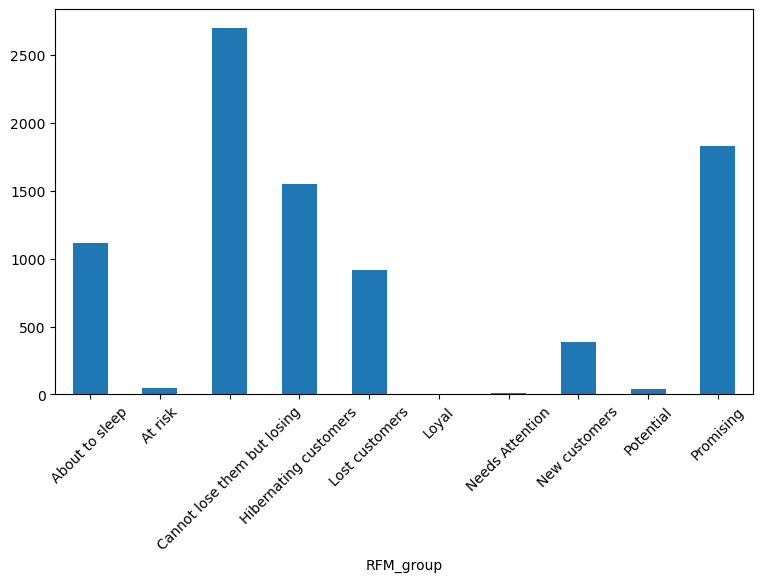

In [406]:
s['count'].plot(kind='bar', rot=45, figsize=(9,5))

# Инсайты и рекомендации

Три клиентских сегмента с наибольшей долей клиентов - это:
- "Cannot lose them but losing" ("Не можем потерять их, но теряем"),
- "Promising" ("Многообещающие"),
- "Hibernating customers" ("Клиенты, находящиеся в спячке".

"Cannot lose them but losing" - это клиенты, которые покупали очень давно, нечасто и на очень большую сумму. Чтобы вернуть их, мы можем предложить им эксклюзивные привилегии, такие как ранний доступ к новым продуктам и специальные скидки.

"Promising" - это это клиенты, которые покупали недавно, нечасто и на очень большую сумму. Т.е. это новые клиенты с высокой покупательской способностью, но с низкой частотой покупок. Нам нужно, чтобы они покупали чаще. Для этого мы можем размещать рекламу, предлагать программы членства, эксклюзивные льготы, рекомендовать комбинации товаров с более высокой стоимостью.

"Hibernating customers" - это клиенты, которые покупали давно, нечасто и на небольшую сумму. С ними сложнее всего работать, т.к. это почти потерянные клиенты. Можно использовать ненавязчивые email-рассылки (раз в 1-2 месяца) с целью не продажи, а пробуждения интереса и ассоциаций с брендом компании.

Основная проблема сейчас - это довольно малое количество клиентов из топовых сегментов. Причина этого - низкая частота транзакций. 8103 клиентов из 8601 имеют одну транзакцию за весь исследуемый период. На это стоит обратить внимание. 

Основной упор стоит сделать на сегмент "Promising". Это второй по количеству сегмент и при должном подходе они могут перейти в топовые сегменты, такие как "Champions" или "Loyal".

Таким образом, основной упор необходимо сделать на увеличение повторных транзакций.

Также мы можем сосредоточиться на конкретных стратегиях для каждого сегмента. Основные рекомендации по работе с каждым сегментом приведены в таблице. Ссылка на автора таблицы: https://github.com/baotran239/Python-Customer-Segmentation-Project?tab=readme-ov-file#v-recommendations

| Segments | Characteristics | Recommendations |
|-------------|-------------|-------------|
|  Champions | - New transactions <br>- Frequent buyers <br>- Highest spenders | - Offer loyalty programs with personalized benefits <br>- Recommend higher-value items and product combos based on order history |
|  Loyal  | - Very frequent buyers<br>- Medium to high spending| - Implement membership ranking strategies <br>- Introduce new products   |
|  Potential  | - New transactions<br>- Multiple purchases but not frequent<br>- Medium to high spending | - Upsell high-value products <br> - Gather feedback and implement engagement strategies |
|  New Customers  | - Recently made their first purchase<br>- Infrequent buyer<br>- Low cart value | - Run ads<br>- Offer discounts for next purchase   |
|  Promising  | - Purchased recently<br>- Infrequent buyer<br>- Large purchase power | - Run ads<br>- Implement membership programs<br>- Offer exclusive perks<br>- Recommend higher-value items and product combos  |
|  Need Attention  | - Haven’t purchased for a while<br>- Moderate purchase frequency<br>- Low to moderate cart value | - Create limited-time promotions<br>- Suggest products based on past purchases |
|  About To Sleep  | - Long time since last purchase<br>- Low purchase frequency<br>- High cart value | - Personalized interactions via email and phone<br>- Offer vouchers, discounts, and exclusive perks |
|  At Risk  | - Haven’t returned for a long time<br>- Used to be a frequent buyer<br>- Medium to high cart value   |- Conduct surveys to identify the root cause and implement solutions |
|  Cannot Lose Them  |- Haven’t returned for a long time<br>- Used to be a frequent buyer<br>- High cart value	 | - Offer exclusive privileges such as early access to new products and special discounts  |
|  Hibernating Customers  | - Very long time since last purchase<br>- Low purchase frequency<br>- Low cart value  | - Personalized interactions via email and phone<br>- Offer vouchers, discounts, and exclusive perks |
|  Lost Customers  | - Very long time since last purchase<br>- Very low purchase frequency<br>- Behavior: Exploratory purchases, one-time buyers who compare products/services | - Implement policies for free product trials |